# 머신 러닝의 네 가지 분류
- 지도학습
  - 샘플 데이터가 주어지면, 알고 있는 타깃에 입력 데이터를 매핑하는 방법을 학습한다.
  - 문자 판독, 음성 인식, 이미지 분류, 언어 번역에 활용
  - 그 외 특이한 변종
    - 시퀀스 생성(sequence generation)
      - 사진이 주어지면 이를 설명하는 캡션 생성 ( 분류 문제)
    - 구문 트리(syntax tree) 예측
      - 문장이 주어지면 분해된 구문 트리를 예측
    - 물체 감지(object detection)
      - 사진이 주어지면 경계 상자(bounding box)를 그려 분류/벡터 회귀 문제
    - 이미지 분할(image segmentation)
      - 사진이 주어졌을 때 픽셀 단위로 특정 물체에 마스킹
  - 종류
    - 이진 분류
    - 다중 분류
    - 스칼라 회귀

- 비지도학습
  - 차원 축소 (dimensionality reduction)
  - 군집 (clustering)

- 강화학습
  - 에이전트로 보상을 최대화 한다

# 머신 러닝 모델 평가
- 과대적합을 완화하고 일반화를 최대화 하는 방법

## 훈련, 검증, 테스트 세트
- 테스트 데이터셋의 어떠한 정보도 훈련,검증에 사용하면 안된다
- 검증 데이터셋에 맞추어 하이퍼 파라미터를 조정하면 과대적합된다
- 방법
  - 홀드 아웃 검증
  - k-겹 교차 검증
  - 셔플링 반복 k겹 교차 검증

### 단순 홀드아웃 검증
- 데이터의 일정량을 테스트 세트로 떼어놓는다.
- from sklearn import train_test_split 을 주로 활용한다
- 데이터가 적은 경우, 검증/테스트 세트가 너무 적어 통계적으로 대표하지 못한다

### k-겹 교차 검증
- 데이터를 동일한 크기의 k개 분할로 나눈다.
- 각 분할 i에 대해 남은 k-1개의 분할로 모델을 훈련한다.
- cross_validate() 함수 활용 가능
  - 단, KerasClassifier 나 KerasRegressor 클래스로 모델을 감싸야 한다.


### 셔플링 반복 k-겹 교차 검증
- k-겹 교차 검증을 적용하기 전에 매번 데이터를 무작위로 섞는다.
- 최종 점수는 k-겹 교차 검증을 실행하여 얻은 점수의 평균

### 주의점
- 대표성 있는 데이터 
  - 클래스가 순서대로 정해져 있는 경우, 데이터 세트를 무작위로 섞어야 한다.)
- 시간의 방향
  - 과거로부터 미래를 예측할 때, 무작위로 섞어서는 절대 안된다.
  - 즉, 테스트 세트에 있는 모든 데이터가 미래의 것이어야 한다.( 훈련에 사용되면 안됨)
- 데이터 중복
  - 한 데이터셋에 어떤 데이터 포인트가 두 번 등장하면, 훈련/검증에 각각 들어가는 경우가 생김!
  - 중복되지 않았는지 확인하는 방법
    - 사이킷런의 GroupKFold 클래스를 cross_validate() 함수에 적용
    

# 데이터 전처리, 특성 공학, 특성 학습

## 신경망을 위한 데이터 전처리

### 벡터화 
- 모든 입력, 타깃은 부동 소수 데이터로 이루어진 텐서이다
- 사운드, 이미지, 텍스트 모두 텐서로 변환해야한다
  - 이 과정을 데이터 벡터화 (data vectorization)이라고 한다
  - i.e. 텍스트를 정수 리스트로 변환, 원핫 인코딩을 사용하여 텐서로 전환

### 값 정규화
- 각 특성을 독립적으로 정규화하여 평균이 0, 표준편차가 1이 되도록 수정
  - 각 값을 평균으로 부터 뺀다
  - 표준편차를 구한다
  - 각 값을 표준편차로 나눈다
- 대부분의 값이 0~1 사이가 되도록 수정
- 균일해야 한다.

### Null 값 처리
- 의미가 없는 값이라면 0으로 입력해도 괜찮

### 특성 공학
- 데이터 & 머신 러닝 알고리즘에 관한 지식을 사용
- 좋은 특성은 적은 데이터로 문제를 풀 수 있다

### 과대적합과 과소적합
- 최적화와 일반화 사이의 줄다리기 ㅇㅇㅇ
- 최적화 : 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
- 일반화 : 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지 의미

- 훈련 데이터의 손실이 낮을수록 테스트 데이터의 손실이 낮다
  - 과소적합(underfitting)되었다
  - 모델의 성능이 발전될 여지가 있다.
  - 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못했다
  - 훈련 데이터에 여러번 반복 훈련하면, 어느 시점부터 일반화 성능이 높아 지지 않는다.
  - 검증 세트의 성능이 멈추고 감소되기 시작한다. 
    - 모델이 과대적합된다!!!
    - training data에 특화된 패턴을 학습한다! (아주 잘못됨)

## 네트워크 크기 축소
- 과대적합을 막는 방법
  - 모델의 크기 (학습 파라미터의 수) 를 줄인다
  - 용량(capacity) : 학습 파라미터의 수
- 찾는 방법
  - 너무 많거나/적거나 하지 않은 적합한 크기를 찾아야 한다 ( 검증 세트를 통해 )
  - 검증 손실이 감소되기 시작할 때까지 층이나 유닛의 수를 늘려준다.


- 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델이다. (적은 파라미터 값을 가진 것)

### 가중치 규제 추가
- L1 규제 : 가중치의 절댓값에 비례하는 비용 추가
- L2 규제 : 가중치의 제곱에 비례하는 비용이 추가
  - 가중치 감쇠(weight decay)라고도 불린다


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
max([max(sequence) for sequence in train_data])

# word_index 는 단어, 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 
# 정수 인덱스가 단어를 매핑하도록 뒤집어준다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

# 2번째 방법 사용
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # 크기가 len(sequences)이고 모든 원소가 0인 리스트
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # results[i] 에서 특정 인덱스의 위치를 1로 만들기
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 검증 데이터 10,000 개 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

[0. 1. 1. ... 0. 0. 0.]


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

model = Sequential()
model.add(Dense(16, kernel_regularizer = regularizers.l2(0.001),
                activation='relu', input_shape=(10000,)))
model.add(Dense(16, kernel_regularizer = regularizers.l2(0.001),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5575 - accuracy: 0.7864 - val_loss: 0.4360 - val_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.3600 - accuracy: 0.9009 - val_loss: 0.3634 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2890 - accuracy: 0.9190 - val_loss: 0.3385 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2531 - accuracy: 0.9319 - val_loss: 0.3372 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 3s 85ms/step - loss: 0.2304 - accuracy: 0.9416 - val_loss: 0.3334 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 3s 99ms/step - loss: 0.2159 - accuracy: 0.9482 - val_loss: 0.3727 - val_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 3s 93ms/step - loss: 0.2045 - accuracy: 0.9518 - val_loss: 0.3668 - val_accuracy: 0.8799
Epoch 8/20
30

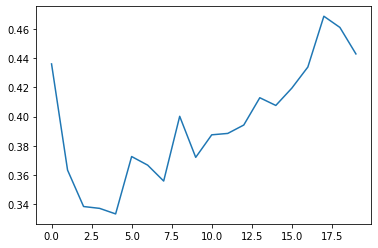

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.show()


### 드롭아웃 추가
- 어떤 입력 샘플에 대하여 일부 비율을 0 으로 변경해주는 것
- 과대적합에 대한 저항이 더 커진다.

In [7]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#### 정리
- 신경망에서 과대적합을 방지하기 위한 방법
  - 훈련 데이터를 더 모은다
  - 네트워크의 용량을 가못싴니다.
  - 가중치 규제를 추가한다
  - 드롭아웃을 추가한다

## 보편적인 머신 러닝 작업 흐름

### 문제 정의와 데이터셋 수집
- 1. 주어진 문제를 정의한다
  - 입력 데이터는 무엇인가
  - 어떤 것을 예측하는 가
- 2. 문제의 종류가 무엇인가?
  - 이진 분류/다중 분류
  - 스칼라/벡터 회귀
  - 다중 레이블 다중 분류
  - 군집,생성 강화학습


### 성공 지표 선택
- 최적화할 손실 함수의 선택 기준
- 분류 문제
  - ROC AUC
- 클래스 문제
  - 정밀도 재현율
- 랭킹, 다중 레이블 문제
  - 평균 정밀도
  

### 평가 방법 선택
- 홀드아웃 검증 세트 분리
- K겹 교차 검증
- 반복 K겹 교차 검증

### 데이터 준비
- 텐서로 구성
- [-1,1] // [0,1] 의 범위로 구성
- 특성마다 범위가 다르면(여러 feature인 경우) 정규화 해야함
- 특성 공학 수행 가능

### 기본보다 나은 모델 훈련하기
- 아주 단순한 모델보다 나은 수준의 작은 모델을 개발한다!!!
- 충분한 데이터가 있고, 주어진 입력으로 출력을 예측할 수 있다는 가설이 설립할 때,
  - 마지막 층의 활성화 함수 결정
  - 손실 함수 결정
    - 주어진 미니 배치 데이터에서 계산 가능
    - 미분 가능해야 함
  - 최적화 설정(optimizer, learning rate) 결정

#### 모델에 맞는 마지막 층의 활성화 함수와 손실 함수 선택

- 이진 분류 -> 시그모이드 -> binary_crossentropy
- 단일 레이블 다중 분류 -> 소프트맥스 -> categorical_crossentropy
- 다중 레이블 다중 분류 -> 시그모이드 -> binary_crossentropy
- 임의 값에 대한 회귀 -> 없음 -> mse
- 0과 1 사이 값에 대한 회귀 -> 시그모이드 -> mse/binary_crossentropy

### 과대적합 모델 만들기
- 층을 추가한다.
- 층의 크기를 키운다
- 더 많은 에포크 동안 훈련한다.

- 단, 훈련, 검증 지표 / 훈련, 검증 손실을 모니터링 한다
- 검증 데이터에서 모델 성능이 감소하기 시작할때, 과대적합에 도달한 것


### 모델 규제, 하이퍼파라미터 튜닝
- 반복적으로 모델을 수정하고, 훈련하고, 검증 데이터에서 평가한다
- 수정, 반복

- 드롭아웃 추가
- 층을 추가/제거 하여 다른 구조 시도
- L1, L2 또는 두가지 모두 추가
- 최적의 설정을 찾기 위해 하이퍼파라미터 변경(층의 유닛 수나 옵티마이저의 학습률)
- 선택적 특성 공학 시도( 새로운 특성 추가/제거)


*** 중요 ***
- 검증 과정에서 얻은 피드백을 사용하여 모델을 튜닝하면 안됨

### 최종 모델 훈련
- 테스트 세트에서 한번 평가
  - 테스트 성능이 검증 데이터보다 성능이 나쁘다면, 검증 과정에서 전혀 신뢰성이 없거나, 모델의 하이퍼 파라미터를 튜닝하는 동안 검증 데이터에 과대적합된 것.
  - 이런 경우 좀 더 신뢰할만한 평가 방법(반복 k-겹 교차검증) 을 수행하는 것이 좋음